In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np

from net2 import Generator2, Discriminator2
from data.mpii import MPIIDataset
from utils.vis import draw_keypoints

In [14]:
checkpoint = torch.load('out/out_27.05.2021_00:29/1999_model.pt')

In [15]:
gen = Generator2().to('cuda')
gen.load_state_dict(checkpoint['g_state_dict'])

<All keys matched successfully>

In [16]:
d = Discriminator()
d.load_state_dict(checkpoint['d_state_dict'])

NameError: name 'Discriminator' is not defined

In [7]:
dataset = MPIIDataset('../data/mpii.json')

=> num db: 10261
=> num selected db: 10261
=> load 10261 samples


In [8]:
dataset.cat_names

['running',
 'dancing',
 'bicycling',
 'walking',
 'fishing and hunting',
 'sport with ball',
 'standing',
 'sitting',
 'skiing',
 'swimming',
 'cooking',
 'driving',
 'rock climbing',
 'horseback',
 'skateboarding',
 'yoga',
 'canoe',
 'training',
 'lying']

In [17]:
category = dataset.cat_names[:19]
print(category[11])

driving


In [18]:
label = dataset.one_hot[:19]
label = Variable(label.type(torch.cuda.LongTensor))

In [19]:
noise = Variable(torch.cuda.FloatTensor(np.random.normal(0, 1, (19, 32))), requires_grad=False)

In [20]:
out = gen(noise, label).cpu().detach().numpy()

running


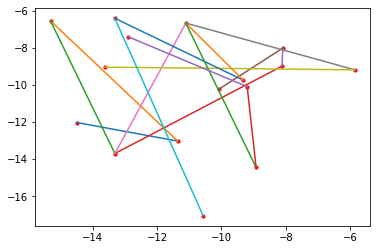

dancing


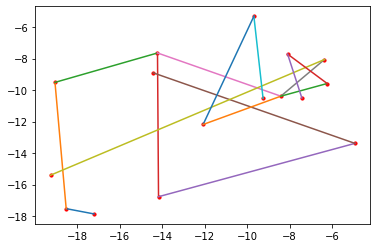

bicycling


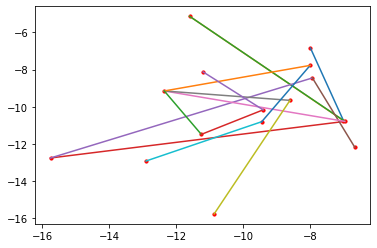

walking


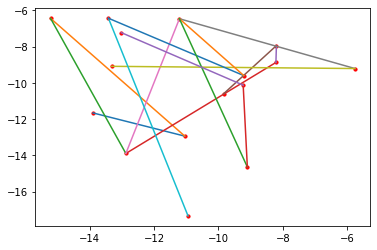

fishing and hunting


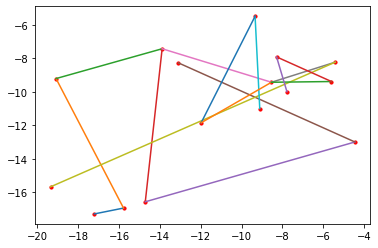

sport with ball


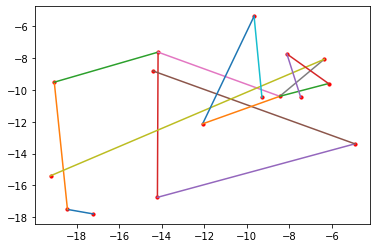

standing


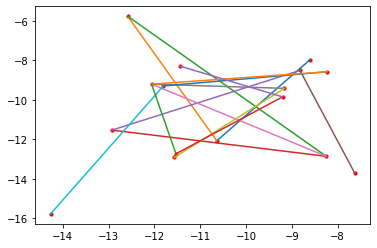

sitting


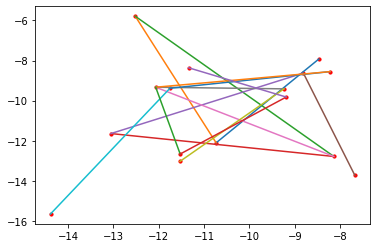

skiing


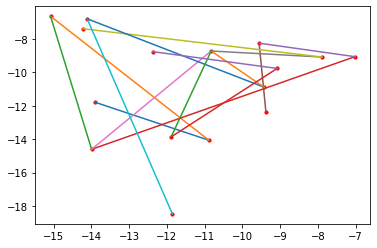

swimming


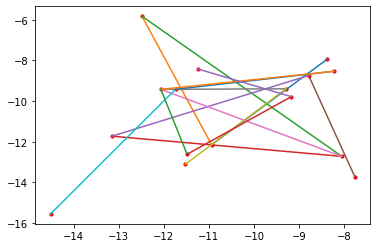

cooking


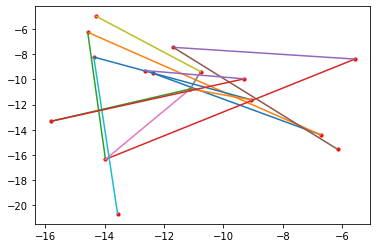

driving


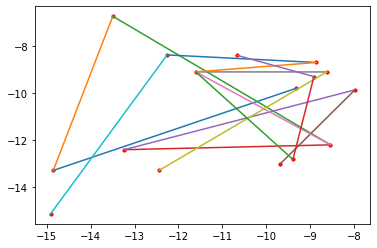

rock climbing


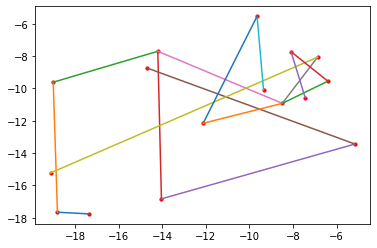

horseback


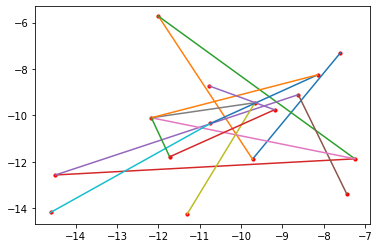

skateboarding


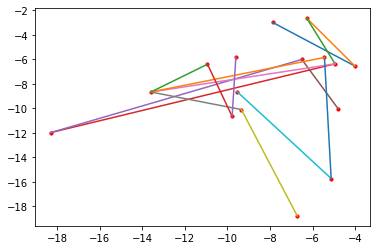

yoga


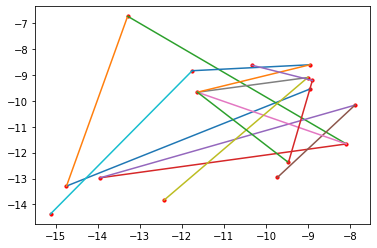

canoe


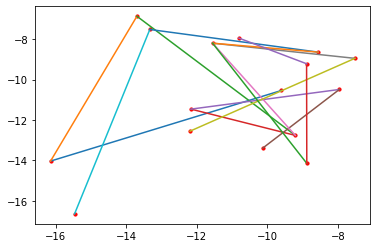

training


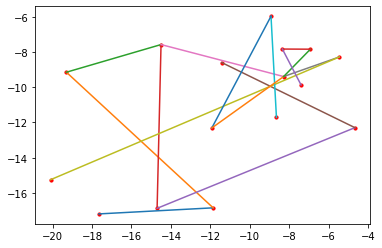

lying


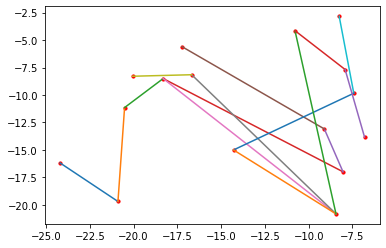

In [21]:
i = 0
for j in out:
    print(category[i])
    i += 1
    draw_keypoints(j)

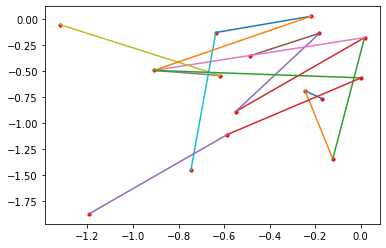

In [30]:
draw_keypoints([[ 0.1688,  0.7625],
        [ 0.2437,  0.6864],
        [ 0.1220,  1.3411],
        [ 0.5487,  0.8860],
        [ 0.1804,  0.1332],
        [ 0.4840,  0.3490],
        [-0.0175,  0.1754],
        [ 0.9080,  0.4905],
        [ 0.6180,  0.5396],
        [ 1.3200,  0.0510],
        [ 0.7457,  1.4503],
        [ 0.6359,  0.1261],
        [ 0.2172, -0.0303],
        [-0.0024,  0.5620],
        [ 0.5872,  1.1088],
        [ 1.1933,  1.8701]])

In [ ]:
draw_keypoints(dataset[232][0])

In [ ]:
label = dataset.one_hot[0]
for i in range(len(dataset)):
    if (np.array_equal(dataset.one_hot.numpy()[18], dataset[i][1].numpy())):
        draw_keypoints(dataset[i][0])